# Estimating correlation through analytical calculations and random walk

## Random walk versus analytical calculation

When the uncertainty on the parameters has to be estimated for the case of fitting through the loglikelihood, another option presents itself.

Using a random walk through parameter space, the distribution for each parameter can be explored and used to estimate both the best value and the uncertainty boundaries. This approach has the added advantage that the code is more stable: using the analytical calculations, the repeated fitting can slightly change the numbers involved, making the code a bit more fragile. The disadvantage of the random walk is that convergence is not guaranteed, nor can the number of steps needed be calculated beforehand.

Another advantage of the random walk is that the correlation between parameters is automatically calculated as well.

For the example dataset:

C:\Users\MyStuff\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Users\MyStuff\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


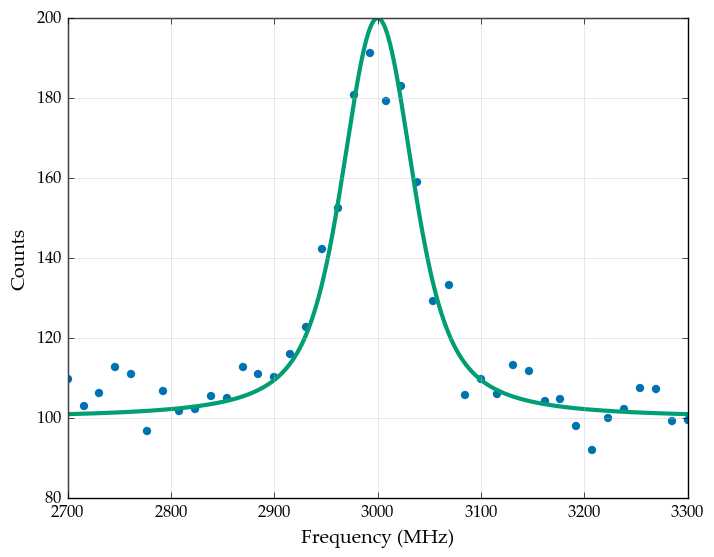

(<matplotlib.figure.Figure at 0x4756d68>,
 <matplotlib.axes._subplots.AxesSubplot at 0xae4c7f0>)

In [1]:
%matplotlib inline

import satlas as s
import numpy as np
np.random.seed(0)

I = 0
J = [1.0, 2.0]

ABC = [0, 0, 0, 0, 0, 0]
df = 3000
scale = 100
background = [100]

base = s.HFSModel(I, J, ABC, df, scale=scale, background_params=background)

frequency = np.linspace(2700, 3300, 40)
response = base(frequency) + 0.5*np.random.randn(frequency.size) * base(frequency)**0.5
base.plot(x=frequency, y=response)

## Analytical correlation maps

To make analytical correlation maps and 1D likelihood parabola's, the command is

FWHMG: 100% ||                                                   | ETA:  0:00:00

FWHML: 100% ||                                                   | ETA:  0:00:00

Amp1__2: 100% ||                                                 | ETA:  0:00:00

Centroid: 100% ||                                                | ETA:  0:00:00

Background0: 100% ||                                             | ETA:  0:00:01

FWHMG FWHML: 100% ||                                             | ETA:  0:00:10

FWHMG Amp1__2: 100% ||                                           | ETA:  0:00:00

FWHML Amp1__2: 100% ||                                           | ETA:  0:00:02

FWHMG Centroid: 100% ||                                          | ETA:  0:00:00

FWHML Centroid: 100% ||                                          | ETA:  0:00:00

Amp1__2 Centroid: 100% ||                                        | ETA:  0:00:00

FWHMG Background0: 100% ||                                       | ETA:  0:00:00

FWHML Background

(<matplotlib.figure.Figure at 0xe6a6d68>,
 array([[<matplotlib.axes._axes.Axes object at 0x000000000E4EFE80>, None,
         None, None, None],
         <matplotlib.axes._axes.Axes object at 0x000000000E42F550>, None,
         None, None],
         <matplotlib.axes._axes.Axes object at 0x000000000E702C88>, None,
         None],
         <matplotlib.axes._axes.Axes object at 0x000000000E2F0470>, None],
         <matplotlib.axes._axes.Axes object at 0x000000000E46E6D8>]], dtype=object),
 <matplotlib.colorbar.Colorbar at 0xe7720b8>)

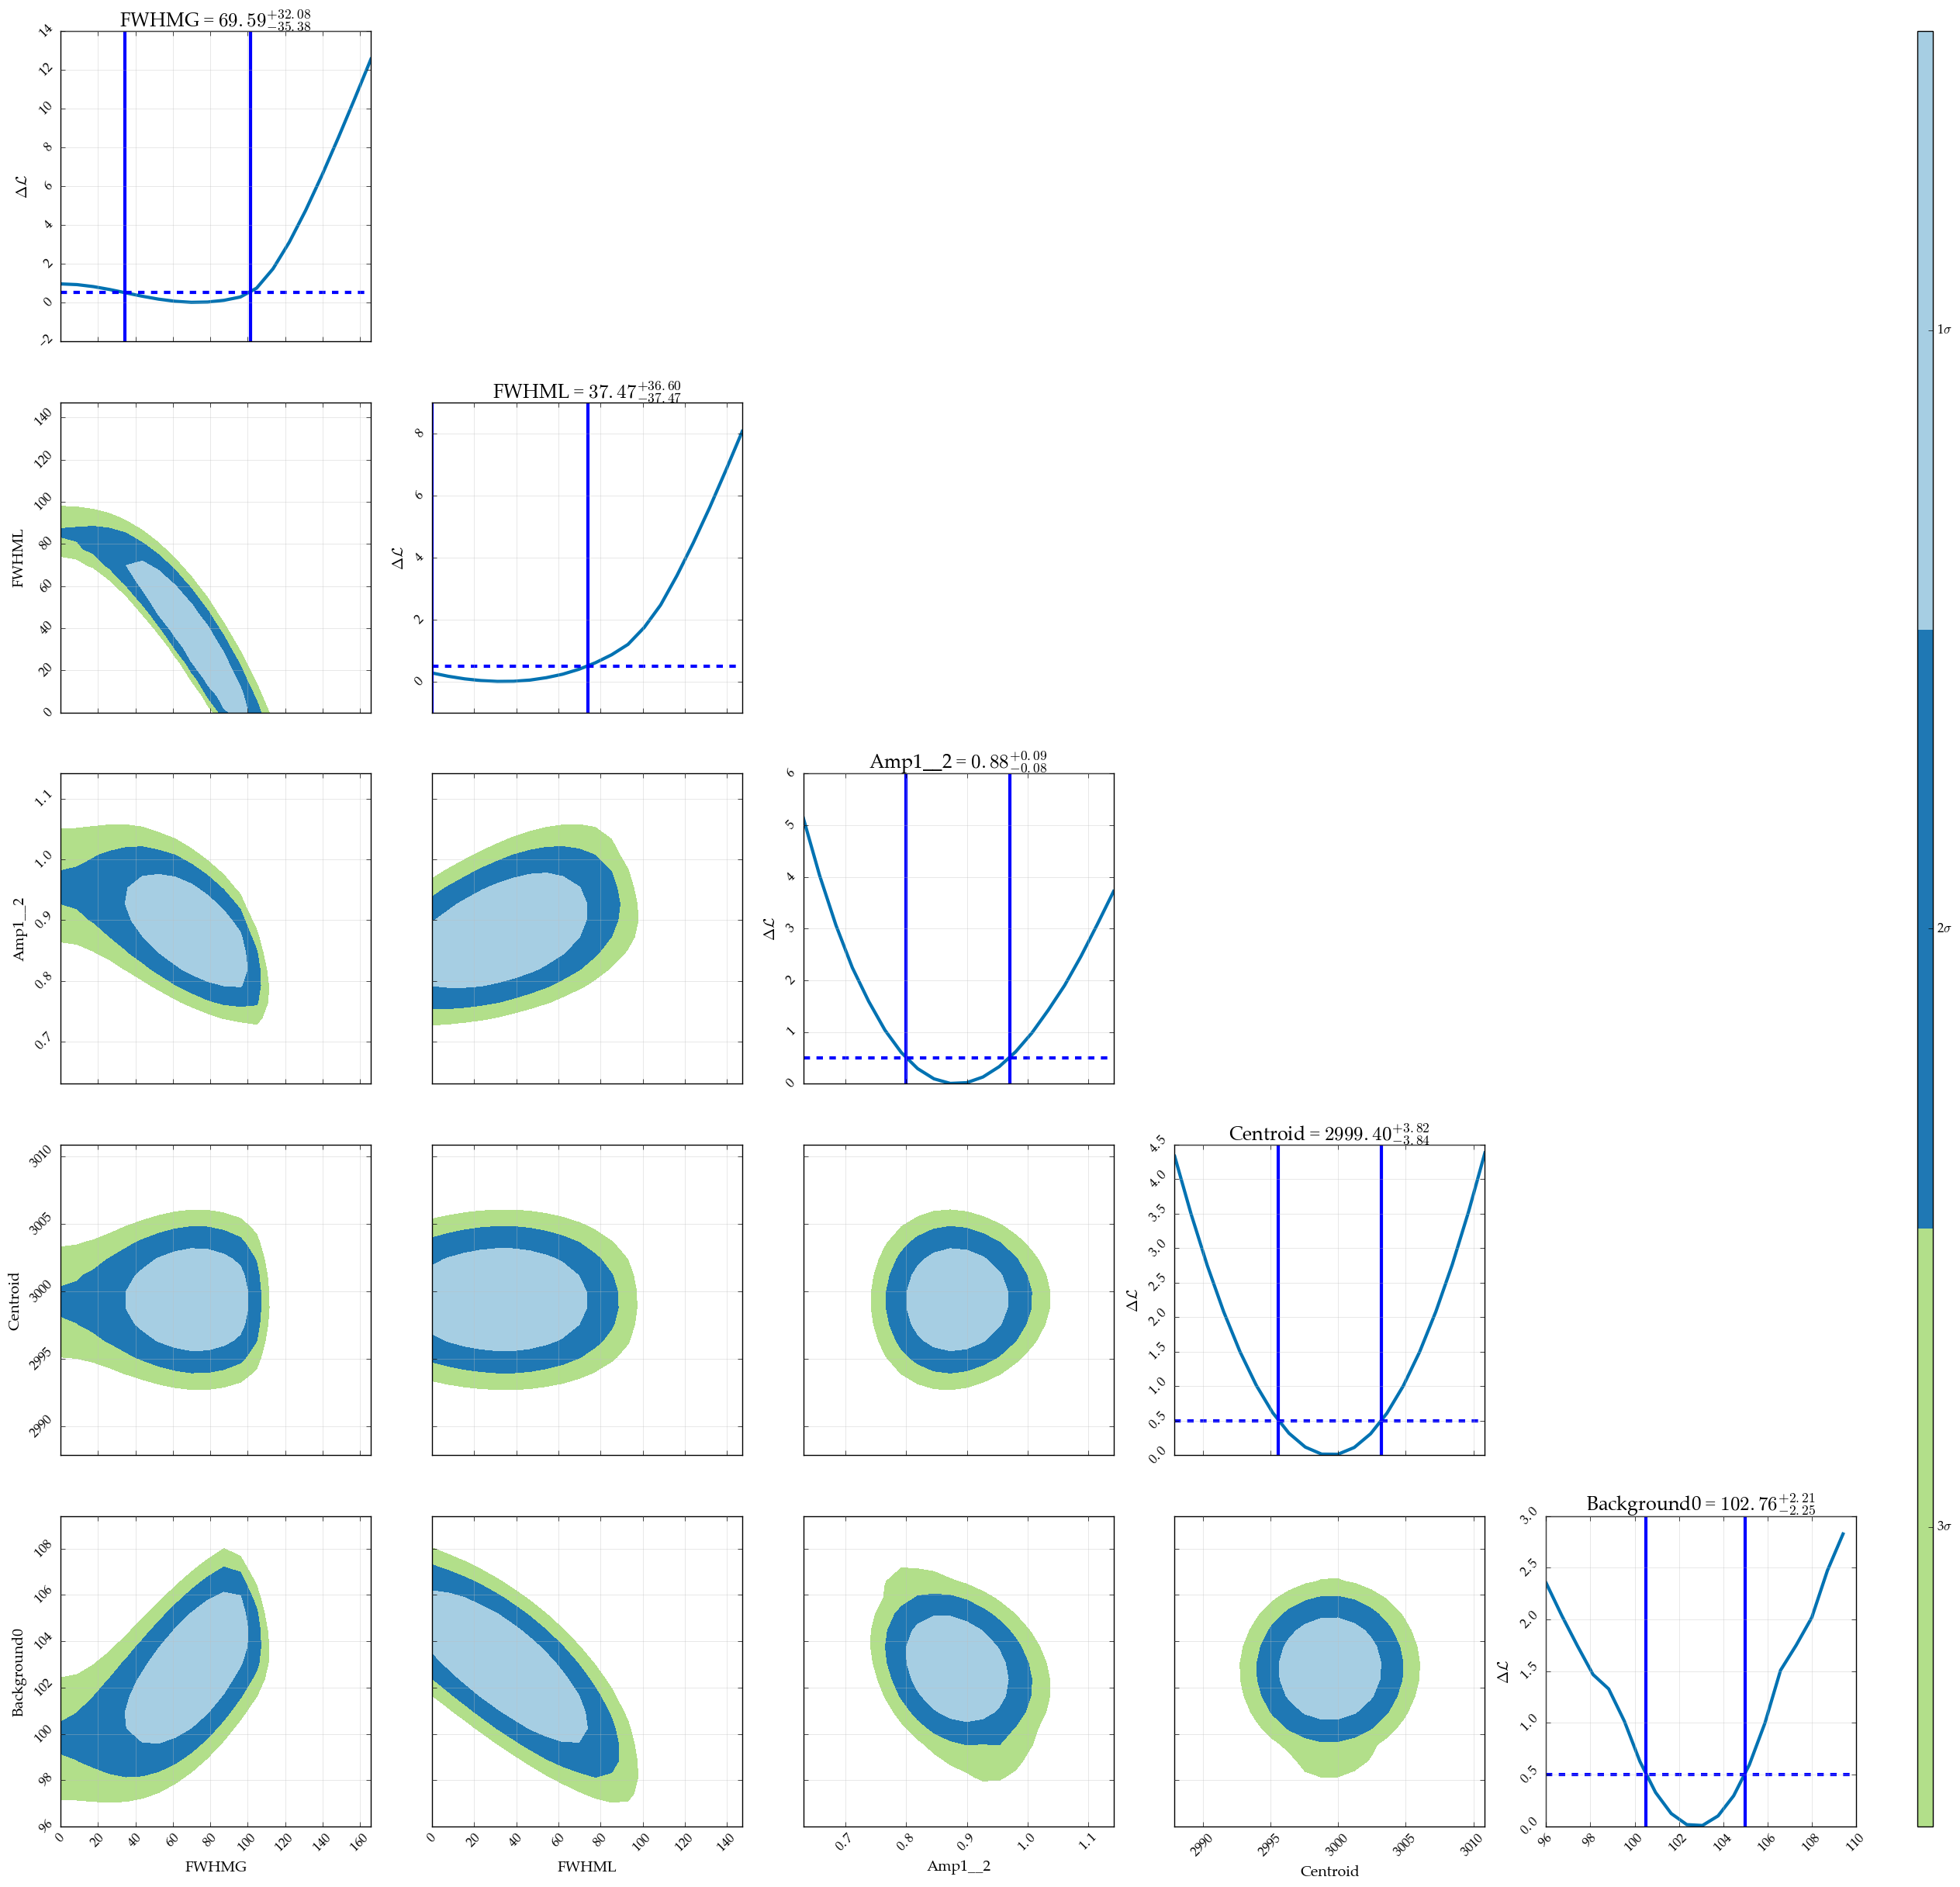

In [6]:
s.likelihood_fit(base, frequency, response)
s.generate_correlation_map(base, frequency, response, method='mle', resolution_diag=20, resolution_map=20)

As can be seen here, the resolution of the correlation maps is clearly visible. Since the resolution defines the number of datapoints on each axis, the calculation time goes as $N^2$, so increasing the resolution increases the calculation time drastically.

Also clearly visible is the fact that the uncertainties are, at least in some cases, non-gaussian. Especially in the FWHM of the profile and in the background parameter, the deviation from a parabolic behaviour is evident.

## Generating and plotting random walks

Initiating the random walk can be done by using the dedicated function, or by passing the *walking=True* keyword to the likelihood fitting method, which will automatically start the walk.

Due to memory concerns, the results from the random walk are saved in a file in either the current directory if only the filename is given, or in another directory if that location is also given.

The random walk algorithm employs the *emcee* package, and more details on arguments for the walk algorithm can be found there.

In [3]:
s.likelihood_fit(base, frequency, response, walking=True, walk_kws={'filename': 'demonstration.h5', 'nsteps': 5000})

Walk:100% ||                                                     | ETA:  0:00:00



(True, 'Optimization terminated successfully.')

Generating plots: 100% |\                                        | ETA:  0:00:00



(<matplotlib.figure.Figure at 0xb80ce80>,
 array([[<matplotlib.axes._axes.Axes object at 0x000000000F9BEAC8>, None,
         None, None, None],
         <matplotlib.axes._axes.Axes object at 0x000000000E047DD8>, None,
         None, None],
         <matplotlib.axes._axes.Axes object at 0x000000000CEE1A90>, None,
         None],
         <matplotlib.axes._axes.Axes object at 0x000000000B81E6D8>, None],
         <matplotlib.axes._axes.Axes object at 0x000000000DEDA470>]], dtype=object),
 <matplotlib.colorbar.Colorbar at 0xf9d8c50>)

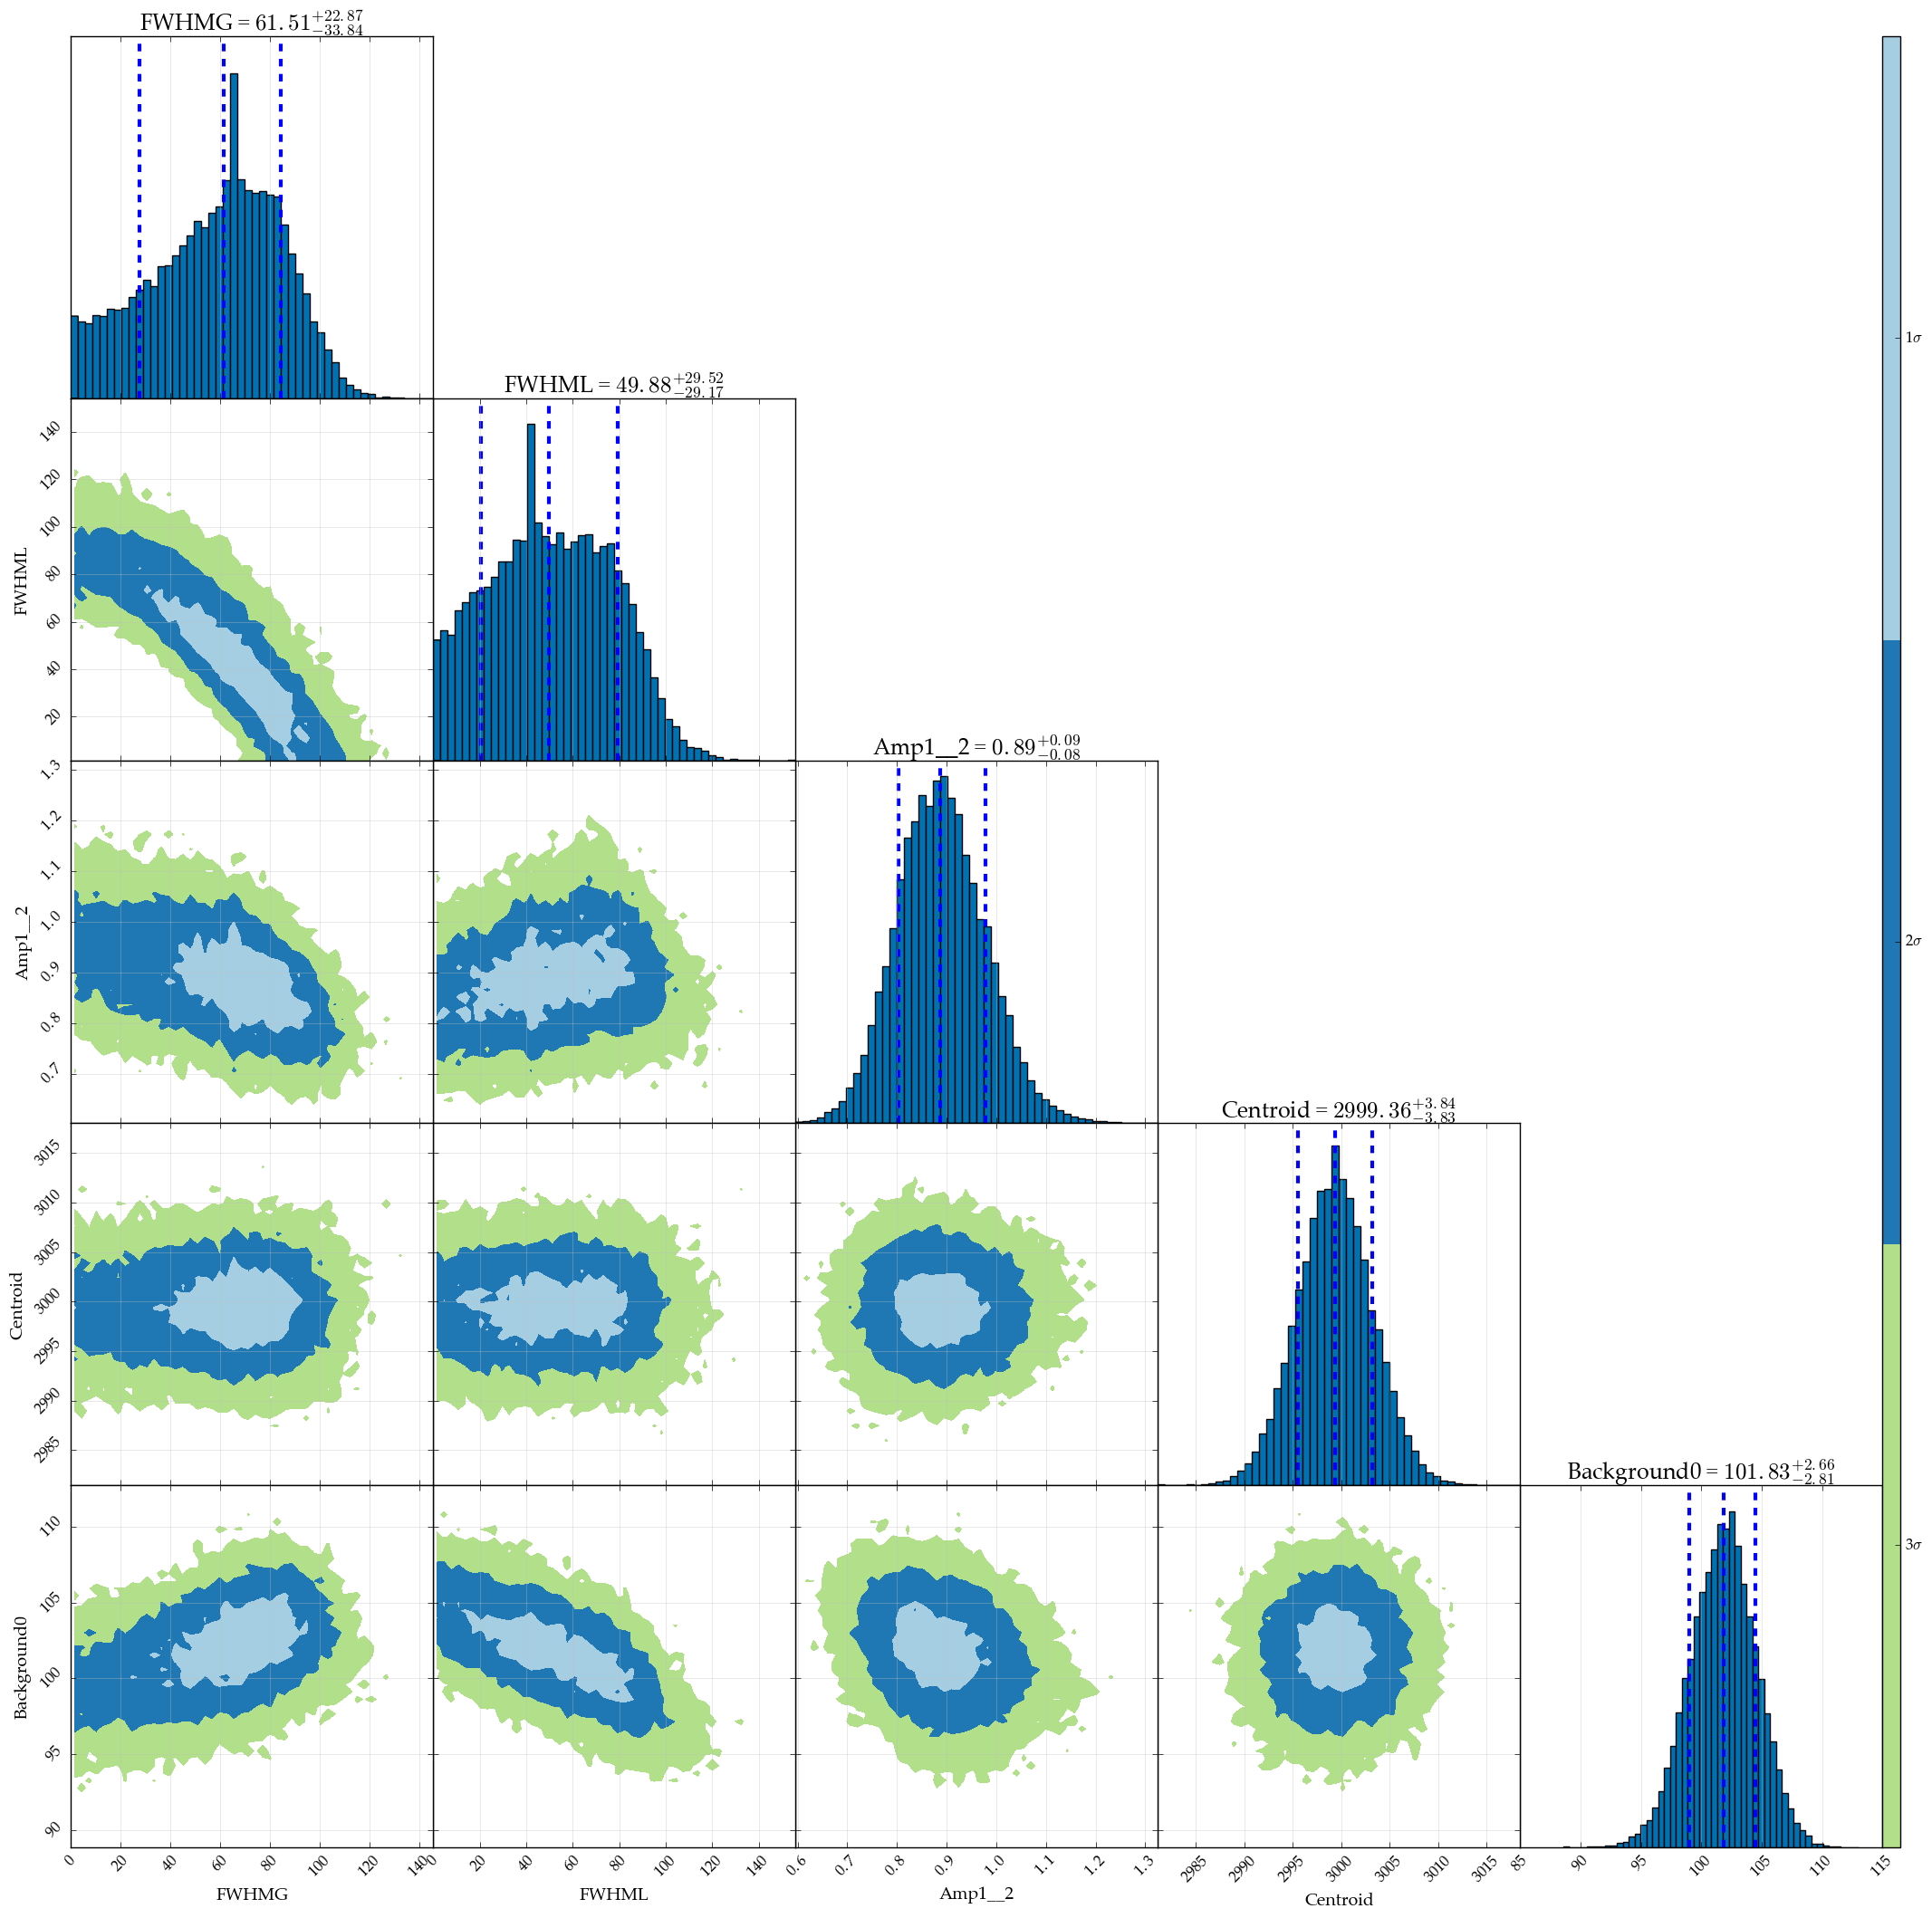

In [4]:
s.generate_correlation_plot('demonstration.h5', bins=50)

We see that the correlation plots show the same behaviour as in the analytical case. A small one-bin peak is also still evident in most of the plots. This might be the result of burnin (see the *emcee* documentation for more information on this).

## Comparison of the two methods

The main difference between the two methods is that the analytical method works by continuously fitting and refitting the data, while the random walk judges the quality of each random step. This results in an important distinction, namely that **the analytical method might not converge**, while the random walk might get into a region where there is no difference between random steps, and **will therefore explore the entire region**, instead of being confined to the best fitting area.
Both options have their pros, cons and gotchas, and care needs to be taken in selecting which method is to be used.